In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/health-insurance-lead-prediction-raw-data/Health Insurance Lead Prediction Raw Data.csv


**IMPORTING LIBRARIES**

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import metrics
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

**LOADING DATA**

In [3]:
ins=pd.read_csv("/kaggle/input/health-insurance-lead-prediction-raw-data/Health Insurance Lead Prediction Raw Data.csv")
ins.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [4]:
ins.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response'],
      dtype='object')

In [5]:
ins.shape

(50882, 14)

In [6]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

**DATA CLEANING**

In [7]:
ins['Health Indicator'].unique()

array(['X1', 'X2', nan, 'X4', 'X3', 'X6', 'X5', 'X8', 'X7', 'X9'],
      dtype=object)

In [8]:
ins['Health Indicator'].value_counts()

X1    13010
X2    10332
X3     6762
X4     5743
X5     1727
X6     1280
X7      196
X8       78
X9       63
Name: Health Indicator, dtype: int64

In [9]:
#ins['Health Indicator']= ins['Health Indicator'].replace('nan',np.nan)
ins['Health Indicator']= ins['Health Indicator'].replace(np.nan, 'X1',regex = True)

In [10]:
ins.isna().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator               0
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [11]:
ins['Holding_Policy_Type'].unique()

array([ 3., nan,  1.,  4.,  2.])

In [12]:
ins['Holding_Policy_Type'].value_counts()

3.0    13279
1.0     8173
2.0     5005
4.0     4174
Name: Holding_Policy_Type, dtype: int64

Removed null values as it can be biased if the null values get replaced by some other value.

In [13]:
ins1=ins
ins1 = ins1.dropna(subset=['Holding_Policy_Duration', 'Holding_Policy_Type'])
ins1.isna().sum()

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64

In [14]:
ins1.shape

(30631, 14)

**DETECTING OUTLIERS**

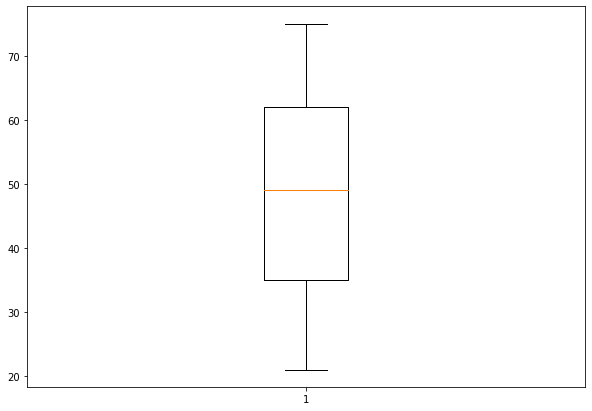

In [15]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(ins1['Upper_Age'])
 
# show plot
plt.show()

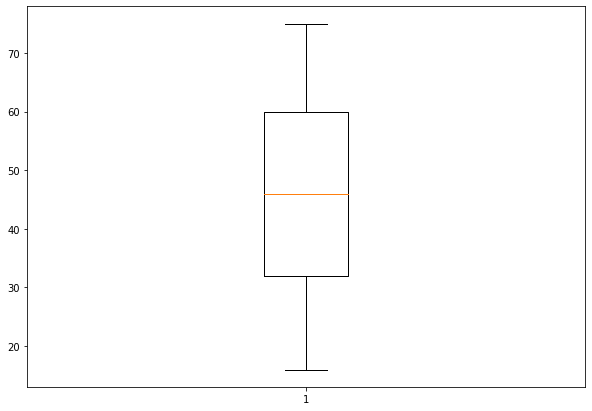

In [16]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(ins1['Lower_Age'])
 
# show plot
plt.show()

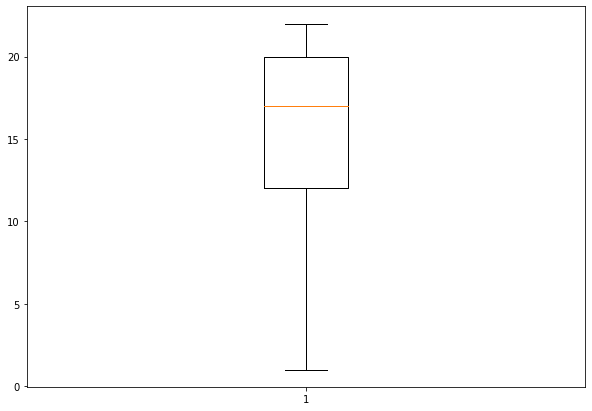

In [17]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(ins1['Reco_Policy_Cat'])
 
# show plot
plt.show()

In [18]:
ins1['Reco_Policy_Premium'].unique()

array([11628.,  7450., 17780., ..., 25726.,  5370., 11374.])

In [19]:
ins1['Reco_Policy_Premium'].value_counts()

17640.0    38
17472.0    36
14784.0    36
11880.0    35
15600.0    34
           ..
20602.4     1
24806.4     1
15525.0     1
24890.0     1
11374.0     1
Name: Reco_Policy_Premium, Length: 5957, dtype: int64

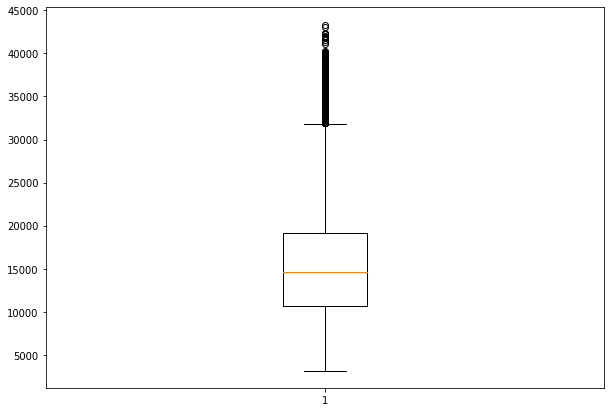

In [20]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(ins1['Reco_Policy_Premium'])
 
# show plot
plt.show()

**DATA EXPLORATION**

In [21]:
ins1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30631 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       30631 non-null  int64  
 1   City_Code                30631 non-null  object 
 2   Region_Code              30631 non-null  int64  
 3   Accomodation_Type        30631 non-null  object 
 4   Reco_Insurance_Type      30631 non-null  object 
 5   Upper_Age                30631 non-null  int64  
 6   Lower_Age                30631 non-null  int64  
 7   Is_Spouse                30631 non-null  object 
 8   Health Indicator         30631 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          30631 non-null  int64  
 12  Reco_Policy_Premium      30631 non-null  float64
 13  Response                 30631 non-null  int64  
dtypes: float64(2), int64(6

In [22]:
insnum = ins1.loc[:, ['Upper_Age', 'Lower_Age', 'Reco_Policy_Cat', 'Response']]
inscat = ins1.loc[:,['Accomodation_Type', 'Reco_Insurance_Type','Is_Spouse', 'Health Indicator', 'Holding_Policy_Duration']]

**UNIVARIATE ANALYSIS**

Understanding distribution of each variable

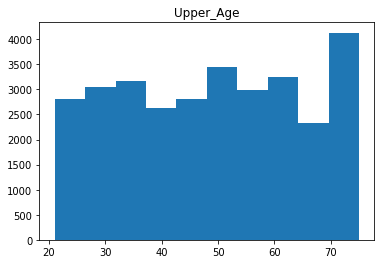

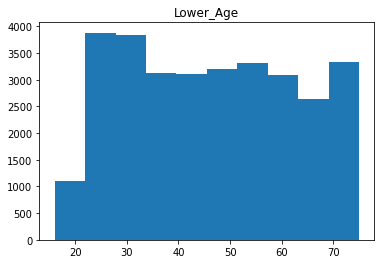

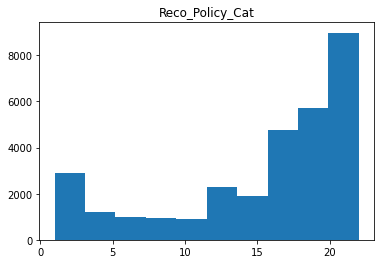

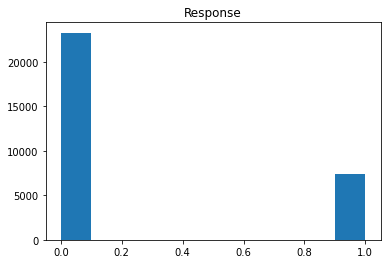

In [23]:
#insnum.plot.hist(alpha = 0.2)
for i in insnum:
    plt.hist(insnum[i])
    plt.title(i)
    plt.show()

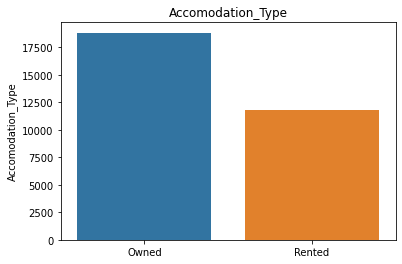

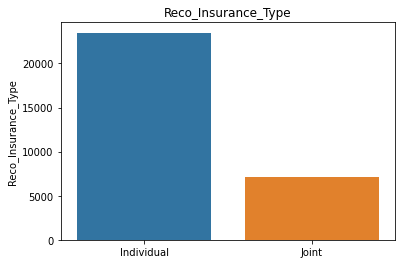

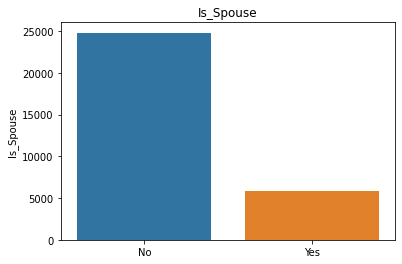

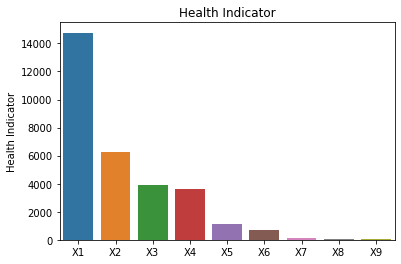

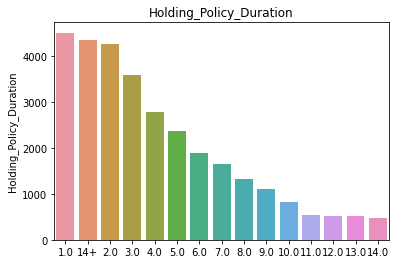

In [24]:
for i in inscat:
   sns.barplot(x=inscat[i].value_counts().index, y=inscat[i].value_counts()).set_title(i)
   plt.show()

**CROSS TABULATION**

**Bivariate Analysis**

Used cross tabulation as the graph doesn't display accurate value

In [25]:
pd.crosstab(ins1['Accomodation_Type'], ins1['Response'])

Response,0,1
Accomodation_Type,,
Owned,14290,4554
Rented,8971,2816


In [26]:
pd.crosstab(ins1['Reco_Insurance_Type'], ins1['Response'])

Response,0,1
Reco_Insurance_Type,,
Individual,17889,5603
Joint,5372,1767


In [27]:
pd.crosstab(ins1['Is_Spouse'], ins1['Response'])

Response,0,1
Is_Spouse,,
No,18847,5963
Yes,4414,1407


In [28]:
pd.crosstab(ins1['Health Indicator'], ins1['Response'])

Response,0,1
Health Indicator,,
X1,11204,3561
X2,4724,1528
X3,2997,915
X4,2753,885
X5,890,251
X6,534,166
X7,90,43
X8,41,13
X9,28,8


In [29]:
pd.crosstab(ins1['Holding_Policy_Duration'], ins1['Response'])

Response,0,1
Holding_Policy_Duration,,
1.0,3502,997
10.0,591,222
11.0,409,137
12.0,383,130
13.0,373,138
14+,3248,1087
14.0,351,115
2.0,3249,1011
3.0,2754,832


In [30]:
pd.crosstab(ins1['Upper_Age'], ins1['Response'])

Response,0,1
Upper_Age,,
21,113,40
22,215,90
23,373,92
24,462,112
25,497,162
26,493,162
27,495,144
28,513,158
29,460,136


In [31]:
pd.crosstab(ins1['Lower_Age'], ins1['Response'])

Response,0,1
Lower_Age,,
16,139,59
17,115,28
18,127,47
19,111,35
20,108,46
21,207,85
22,308,128
23,454,116
24,533,136


**Pearson correlation**

To understand the relationship between each variable

In [32]:
#pearson correlation
print(ins1.corr())

                           ID  Region_Code  Upper_Age  Lower_Age  \
ID                   1.000000    -0.001473  -0.007801  -0.005169   
Region_Code         -0.001473     1.000000  -0.003646  -0.002077   
Upper_Age           -0.007801    -0.003646   1.000000   0.895399   
Lower_Age           -0.005169    -0.002077   0.895399   1.000000   
Holding_Policy_Type  0.006649     0.011599   0.141890   0.118028   
Reco_Policy_Cat     -0.005141    -0.060833   0.025704   0.022571   
Reco_Policy_Premium -0.007460    -0.010998   0.748960   0.524135   
Response             0.007345     0.000087  -0.003073  -0.009705   

                     Holding_Policy_Type  Reco_Policy_Cat  \
ID                              0.006649        -0.005141   
Region_Code                     0.011599        -0.060833   
Upper_Age                       0.141890         0.025704   
Lower_Age                       0.118028         0.022571   
Holding_Policy_Type             1.000000         0.079678   
Reco_Policy_Cat      

<AxesSubplot:>

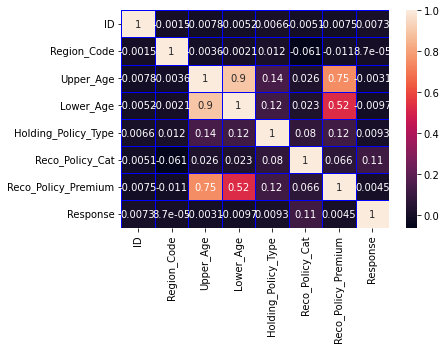

In [33]:
sns.heatmap(ins1.corr(), annot = True, linewidth = 1 , linecolor = "blue")

**FEATURE ENGINEERING**

Converting categorical variable to numerical variable

In [34]:
# Removing ID and Region Code
del ins1['Region_Code']
del ins1['ID']

In [35]:
ins1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30631 entries, 0 to 50881
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   City_Code                30631 non-null  object 
 1   Accomodation_Type        30631 non-null  object 
 2   Reco_Insurance_Type      30631 non-null  object 
 3   Upper_Age                30631 non-null  int64  
 4   Lower_Age                30631 non-null  int64  
 5   Is_Spouse                30631 non-null  object 
 6   Health Indicator         30631 non-null  object 
 7   Holding_Policy_Duration  30631 non-null  object 
 8   Holding_Policy_Type      30631 non-null  float64
 9   Reco_Policy_Cat          30631 non-null  int64  
 10  Reco_Policy_Premium      30631 non-null  float64
 11  Response                 30631 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 3.0+ MB


In [36]:
#onehot encoding
ins1 = pd.get_dummies(ins1, columns=["City_Code","Holding_Policy_Duration","Accomodation_Type", "Reco_Insurance_Type", "Is_Spouse", "Health Indicator", "Holding_Policy_Type"])

In [37]:
# Getting categorical variables yet to change
#obj_df = ins1.select_dtypes(include=['object'])
#obj_df

There's not much to do scaling here as this dataset contains mostly the categorical variables.

Feature extraction has to be done as there are more features due to one hot encoding

**Removing target variable to perform Feature Extraction**

In [38]:
ins1_exp = ins1.drop(['Response'], axis = 1)
ins1_target = ins1['Response']
ins1_target = pd.DataFrame(ins1_target)

**FEATURE EXTRACTION**

**Near Zero Variance**

To get the robust features

In [39]:
ins1_exp.shape

(30631, 74)

- df = df.loc[df.Embarked.notna(), ['Survived', 'Pclass', 'Sex', 'Embarked']]
      <Near Zeo Variance- VAriance thresholding>
       vt = VarianceThreshold(threshold=1)
        # Fit
        _ = vt.fit(ansur_male_num)
        # Get the boolean mask
        mask = vt.get_support()
        ansur_reduced = ansur_male_num.loc[:, mask]
         ansur_reduced.shape

In [43]:
vt = VarianceThreshold(threshold=1)
# Fit
vtfit= vt.fit(ins1_exp)
# Get the boolean mask
mask = vt.get_support()
reduced_features = ins1_exp.loc[:, mask]
reduced_features.shape

(30631, 4)

In [45]:
reduced_features.head()

,Upper_Age,Lower_Age,Reco_Policy_Cat,Reco_Policy_Premium
0,36,36,22,11628.0
2,32,32,19,7450.0
3,52,48,19,17780.0
4,44,44,16,10404.0
5,52,52,22,15264.0


Now, I have got 4 features by reducing near zero variance features.

**Joining target variable**

In [46]:
new_ins = ins1.loc[:,['Upper_Age','Lower_Age','Reco_Policy_Cat','Reco_Policy_Premium','Response']]
new_ins.head()

,Upper_Age,Lower_Age,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,36,36,22,11628.0,0
2,32,32,19,7450.0,1
3,52,48,19,17780.0,0
4,44,44,16,10404.0,0
5,52,52,22,15264.0,1


**Model Building:**

Trying out different classifiers to find the best one

1. Naive Bayes
2. Logistic Regression
3. Decision Tree
4. K-nearest neighbour
5. Support Vector Classifier

In [47]:
X_train = new_ins.iloc[:,:4]
X_train.head()

,Upper_Age,Lower_Age,Reco_Policy_Cat,Reco_Policy_Premium
0,36,36,22,11628.0
2,32,32,19,7450.0
3,52,48,19,17780.0
4,44,44,16,10404.0
5,52,52,22,15264.0


In [48]:
col_names = ['Upper_Age','Lower_Age', 'Reco_Policy_Cat', 'Reco_Policy_Premium']
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train_scaled = s_scaler.fit_transform(X_train)
X_train_scaled= pd.DataFrame(X_train_scaled, columns=col_names)

In [49]:
Y_train= new_ins['Response']

**NAIVE BAYES**

In [50]:
#Naive bayes
gnb = GaussianNB()
cv = cross_val_score (gnb, X_train_scaled, Y_train, cv=5)
print (cv)
print (cv.mean())

[0.75942549 0.75938622 0.75938622 0.75938622 0.75938622]
0.7593940768692878


The Naive Bayes has given an accuracy of 75.93%.

**Evaluation:**
Evaluation using Confusion Matrix and Classification report

In [51]:
#Confusion matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(gnb, X_train_scaled, Y_train, cv=5)
conf_mat = confusion_matrix(Y_train, y_pred)
print(conf_mat)

[[23261     0]
 [ 7370     0]]


In [52]:
tp = conf_mat[0,0]
fp = conf_mat[1,0]
fn = conf_mat[0,1]
tn = conf_mat[1,1]
print('TP:',tp)
print('FP:',fp)
print('FN:',fn)
print('TN:',tn)

TP: 23261
FP: 7370
FN: 0
TN: 0


Here in the confusion matrix we can see that the Naive Bayes model has not predicted any of the Negatives. Hence this model is not ideal for this dataset. So, I'm eliminating this classifier.

**LOGISTIC REGRESSION**

In [53]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression (max_iter = 2000)
cv1 = cross_val_score (lr, X_train_scaled, Y_train, cv = 5)
print (cv1)
print (cv1.mean())

[0.75942549 0.75938622 0.75938622 0.75938622 0.75938622]
0.7593940768692878


The Logistic Regression has given an accuracy of 75.93%.

In [54]:
#Confusion matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(lr, X_train_scaled, Y_train, cv=5)
conf_mat = confusion_matrix(Y_train, y_pred)
print(conf_mat)

[[23261     0]
 [ 7370     0]]


Here from the confusion matrix we can see that the Logistic Regression model has not predicted any of the Negatives. Hence this model is not ideal for this dataset. Again, I'm eliminating this model for the prediction.

**DECISION TREE**

In [55]:
#Decision Tree
dt = tree.DecisionTreeClassifier (random_state = 1)
cv2 = cross_val_score (dt, X_train_scaled, Y_train, cv=5)
print (cv2)
Acc_DT = cv2.mean()
print (Acc_DT)

[0.66051901 0.64805746 0.63663075 0.65311786 0.64920013]
0.6495050434536662


The Decision Tree algorithm has given an accuracy of 64.95%.

In [56]:
#Confusion matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(dt, X_train_scaled, Y_train, cv=5)
conf_mat = confusion_matrix(Y_train, y_pred)
print(conf_mat)

[[17754  5507]
 [ 5229  2141]]


In [57]:
#Classification Report
from sklearn.metrics import classification_report, accuracy_score, make_scorer
def classification_report_with_accuracy_score(Y_train, y_pred):

    print (classification_report(Y_train, y_pred))
    return accuracy_score(Y_train, y_pred)

nested_score = cross_val_score(dt, X=X_train_scaled, y=Y_train, cv=5, \
               scoring=make_scorer(classification_report_with_accuracy_score))
print(nested_score)

              precision    recall  f1-score   support

           0       0.77      0.78      0.78      4653
           1       0.28      0.27      0.28      1474

    accuracy                           0.66      6127
   macro avg       0.53      0.53      0.53      6127
weighted avg       0.65      0.66      0.66      6127

              precision    recall  f1-score   support

           0       0.77      0.76      0.77      4652
           1       0.28      0.30      0.29      1474

    accuracy                           0.65      6126
   macro avg       0.53      0.53      0.53      6126
weighted avg       0.66      0.65      0.65      6126

              precision    recall  f1-score   support

           0       0.77      0.75      0.76      4652
           1       0.27      0.29      0.28      1474

    accuracy                           0.64      6126
   macro avg       0.52      0.52      0.52      6126
weighted avg       0.65      0.64      0.64      6126

              preci

**K-NEAREST NEIGHBOUR**

In [58]:
#KNN
knn = KNeighborsClassifier()
cv3 = cross_val_score (knn, X_train_scaled, Y_train, cv=5)
print (cv3)
Acc_KNN = cv3.mean()
print (Acc_KNN)

[0.7187857  0.7158015  0.71433235 0.71286321 0.71384264]
0.7151250804537176


The K-nearest neighbour classifier has given an accuracy of 71.51%.

In [59]:
#Confusion matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(knn, X_train_scaled, Y_train, cv=5)
conf_mat = confusion_matrix(Y_train, y_pred)
print(conf_mat)

[[20868  2393]
 [ 6333  1037]]


In [60]:
#Classification Report
from sklearn.metrics import classification_report, accuracy_score, make_scorer
def classification_report_with_accuracy_score(Y_train, y_pred):

    print (classification_report(Y_train, y_pred))
    return accuracy_score(Y_train, y_pred)

nested_score = cross_val_score(knn, X=X_train_scaled, y=Y_train, cv=5, \
               scoring=make_scorer(classification_report_with_accuracy_score))
print(nested_score)

              precision    recall  f1-score   support

           0       0.77      0.91      0.83      4653
           1       0.30      0.12      0.17      1474

    accuracy                           0.72      6127
   macro avg       0.53      0.51      0.50      6127
weighted avg       0.65      0.72      0.67      6127

              precision    recall  f1-score   support

           0       0.77      0.90      0.83      4652
           1       0.31      0.14      0.19      1474

    accuracy                           0.72      6126
   macro avg       0.54      0.52      0.51      6126
weighted avg       0.66      0.72      0.67      6126

              precision    recall  f1-score   support

           0       0.77      0.89      0.83      4652
           1       0.31      0.15      0.20      1474

    accuracy                           0.71      6126
   macro avg       0.54      0.52      0.51      6126
weighted avg       0.66      0.71      0.68      6126

              preci

**SUPPORT VECTOR CLASSIFIER**

In [61]:
#Support Vector Classifier
svc = SVC (probability = True)
cv4 = cross_val_score (svc, X_train_scaled, Y_train, cv=5)
print (cv4)
print (cv4.mean())


[0.75942549 0.75938622 0.75938622 0.75938622 0.75938622]
0.7593940768692878


The Support Vector Classifier has given an acccuracy of 75.93%.

In [62]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(svc, X_train_scaled, Y_train, cv=5)
conf_mat = confusion_matrix(Y_train, y_pred)
print(conf_mat)

[[23261     0]
 [ 7370     0]]


From the confusion matrix we can see that the Support Vector Classifier model has not predicted any of the Negatives. Hence this model is not ideal for this dataset. So, I'm eliminating this classifier.

**Model Building with evaluation
Ensembling Techniques with evaluation**

**RANDOM FOREST CLASSIFIER**

In [63]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier (random_state = 1)
cv5 = cross_val_score (rf, X_train_scaled, Y_train, cv=5)
print (cv5)
Acc_RF = cv5.mean()
print ('Accuracy of Random Forest Classifier:',Acc_RF)

[0.69920026 0.70078355 0.68903036 0.69360104 0.69588639]
Accuracy of Random Forest Classifier: 0.695700319939238


**SOFT VOTING CLASSIFIER**

In [64]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier (estimators = [('dt',dt),('knn',knn), ('rf',rf), voting = 'soft')
cv6 = cross_val_score (voting_clf, X_train_scaled, Y_train, cv=5)
print (cv6)
Acc_Soft = cv6.mean()
print ('Accuracy of Soft Voting Classifier:',Acc_Soft)

SyntaxError: invalid syntax (607779779.py, line 2)

In [ ]:
#Evaluation
#Confusion Matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(voting_clf, X_train_scaled, Y_train, cv=5)
conf_mat = confusion_matrix(Y_train, y_pred)
print(conf_mat)

In [ ]:
c = {'Classifier':['Decision Tree','K Nearest Neighbors','Random Forest Classifier','Soft Voting Classifier'],'Accuracy_CV':[Acc_DT,Acc_KNN,Acc_RF,Acc_Soft]}
classifiers = pd.DataFrame(c)
classifiers

**Conclusion:**
From this analysis it seems that KNN and Soft Voting Classifier are good models for this dataset.